In [38]:
import os,glob
import numpy as np
import scipy.io
import librosa
import sklearn.metrics
import torch

import matplotlib
import matplotlib.pylab as plt
from matplotlib import cm

In [35]:
sr      = 16000
n_fft   = 640
n_shift = 160
n_mels  = 32

In [36]:
mel_basis = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

## Path

In [3]:
root_label = '/home/data/kbh/AVTR/vad_label/'
root_data  = '/home/data/kbh/AVTR/labeled_1ch/'
root_output = '/home/data/kbh/VADK/test/'
list_target =  [ x for x in glob.glob(os.path.join(root_data,'*.wav'))]

## Test

In [46]:
path_target = list_target[0]
name_target = path_target.split('/')[-1]
id_target   = name_target.split('.')[0]
id_target   = id_target.split('_')[0] + '_'+id_target.split('_')[1]
raw_label = scipy.io.loadmat(root_label + id_target+'.mat')['label'][0,:]
raw,_   = librosa.load(root_data + name_target,sr=16000)
# Wav to Mel
spec = librosa.stft(raw,window='hann',n_fft=n_fft,hop_length=n_shift, win_length=None,center=True,dtype=np.cdouble)
print(np.shape(spec))
mel = np.matmul(mel_basis,np.abs(spec))
pt = torch.from_numpy(mel)

# save
data = {"mel":pt,"label":raw_label}
torch.save(data,os.path.join('.',str(0)+'.pt'))

print(pt.shape)

print(np.shape(raw))
print(np.shape(raw_label))

(321, 9383)
torch.Size([32, 9383])
(1501184,)
(9382,)


In [47]:
1501184/160

9382.4

In [48]:
idx_label = list(range(9382))
idx_label = [i * 160for i in idx_label]
print(len(idx_label))

9382


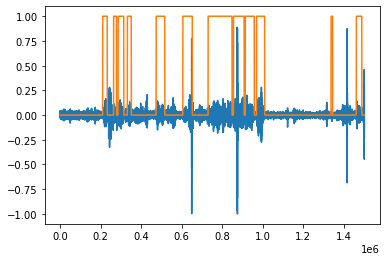

In [49]:
plt.plot(raw)
plt.plot(idx_label,raw_label)
plt.show()

## Sync data

In [52]:
# synced label for stft
label = np.zeros(len(raw_label))

for i in range(len(raw_label)-3):
    if raw_label[i] or raw_label[i+1] or raw_label[i+2] or raw_label[i+3] :
        label[i]=1
print(np.shape(label))

(9382,)


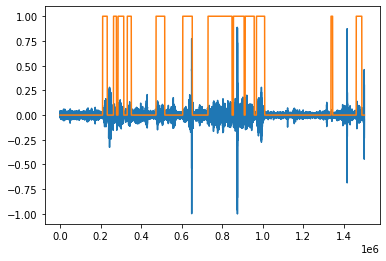

In [53]:
plt.plot(raw)
plt.plot(idx_label,label)
plt.show()

In [54]:
range(len(raw_label)-3)

range(0, 9379)

In [57]:
print(list(range(4)))

[0, 1, 2, 3]
